# Step 1: 清洗数据，转换数据格式

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd


In [13]:
dataPath = Path("F:\\Projects\\2022-11 Simulation\\仿真振动信号数据")
files = [file for file in dataPath.iterdir() if "sum" not in file.name]
out_file = dataPath / "vibration_sum.xlsx"
writer = pd.ExcelWriter(out_file)

for file in files:
    with open(file, encoding='utf-8') as temp_f:
        col_count = [len(l.split(",")) for l in temp_f.readlines()]

    column_names = [i for i in range(max(col_count))]
    data = pd.read_csv(file, skip_blank_lines=True, error_bad_lines=False, names=column_names)
    labels = data.iloc[len(data)-2,:]
    signals = data.iloc[len(data)-1,:]
    time_series = []
    for label in labels:
        if "ppb" not in label: continue
        cur_time = label.split("t=")[-1]
        if len(time_series)==0 or time_series[len(time_series)-1] != cur_time:
            time_series.append(cur_time)
    signals_reformat = pd.DataFrame(columns=['x', 'y', 'z'], index=time_series)
    for i, signal in enumerate(signals):
        label = labels[i]
        cur_time = label.split("t=")[-1]
        if "ppb1" in label:
            signals_reformat.loc[cur_time, 'x'] = signal
        elif "ppb2" in label:
            signals_reformat.loc[cur_time, 'y'] = signal
        else:
            signals_reformat.loc[cur_time, 'z'] = signal

    signals_reformat.to_excel(writer,sheet_name=file.stem)

writer.save()
writer.close()

D:\Programming\Anaconda\envs\py38-pt18\lib\site-packages\IPython\core\interactiveshell.py:3437: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
D:\Programming\Anaconda\envs\py38-pt18\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


# Step 2: 读取数据，绘制图像

In [1]:
import numpy as np
import pandas as pd
from pylab import *
from palettable.colorbrewer.qualitative import Set2_7
import h5py
from pathlib import Path
from domainbed.lib import FFT
from scipy import signal
from scipy.interpolate import interp2d
import scipy.io as scio

olors = Set2_7.mpl_colors

params = {
    'axes.labelsize': 8,
    'font.size': 8,
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': False,
    'figure.figsize': [4.5, 4.5]
}
rcParams.update(params)
plt.style.use(['science', 'no-latex', 'cjk-sc-font'])

In [2]:
dataPath = Path("F:\\Projects\\2022-11 Simulation\\仿真振动信号数据")
file = dataPath / "vibration_sum.xlsx"

data = pd.read_excel(file, sheet_name=None)

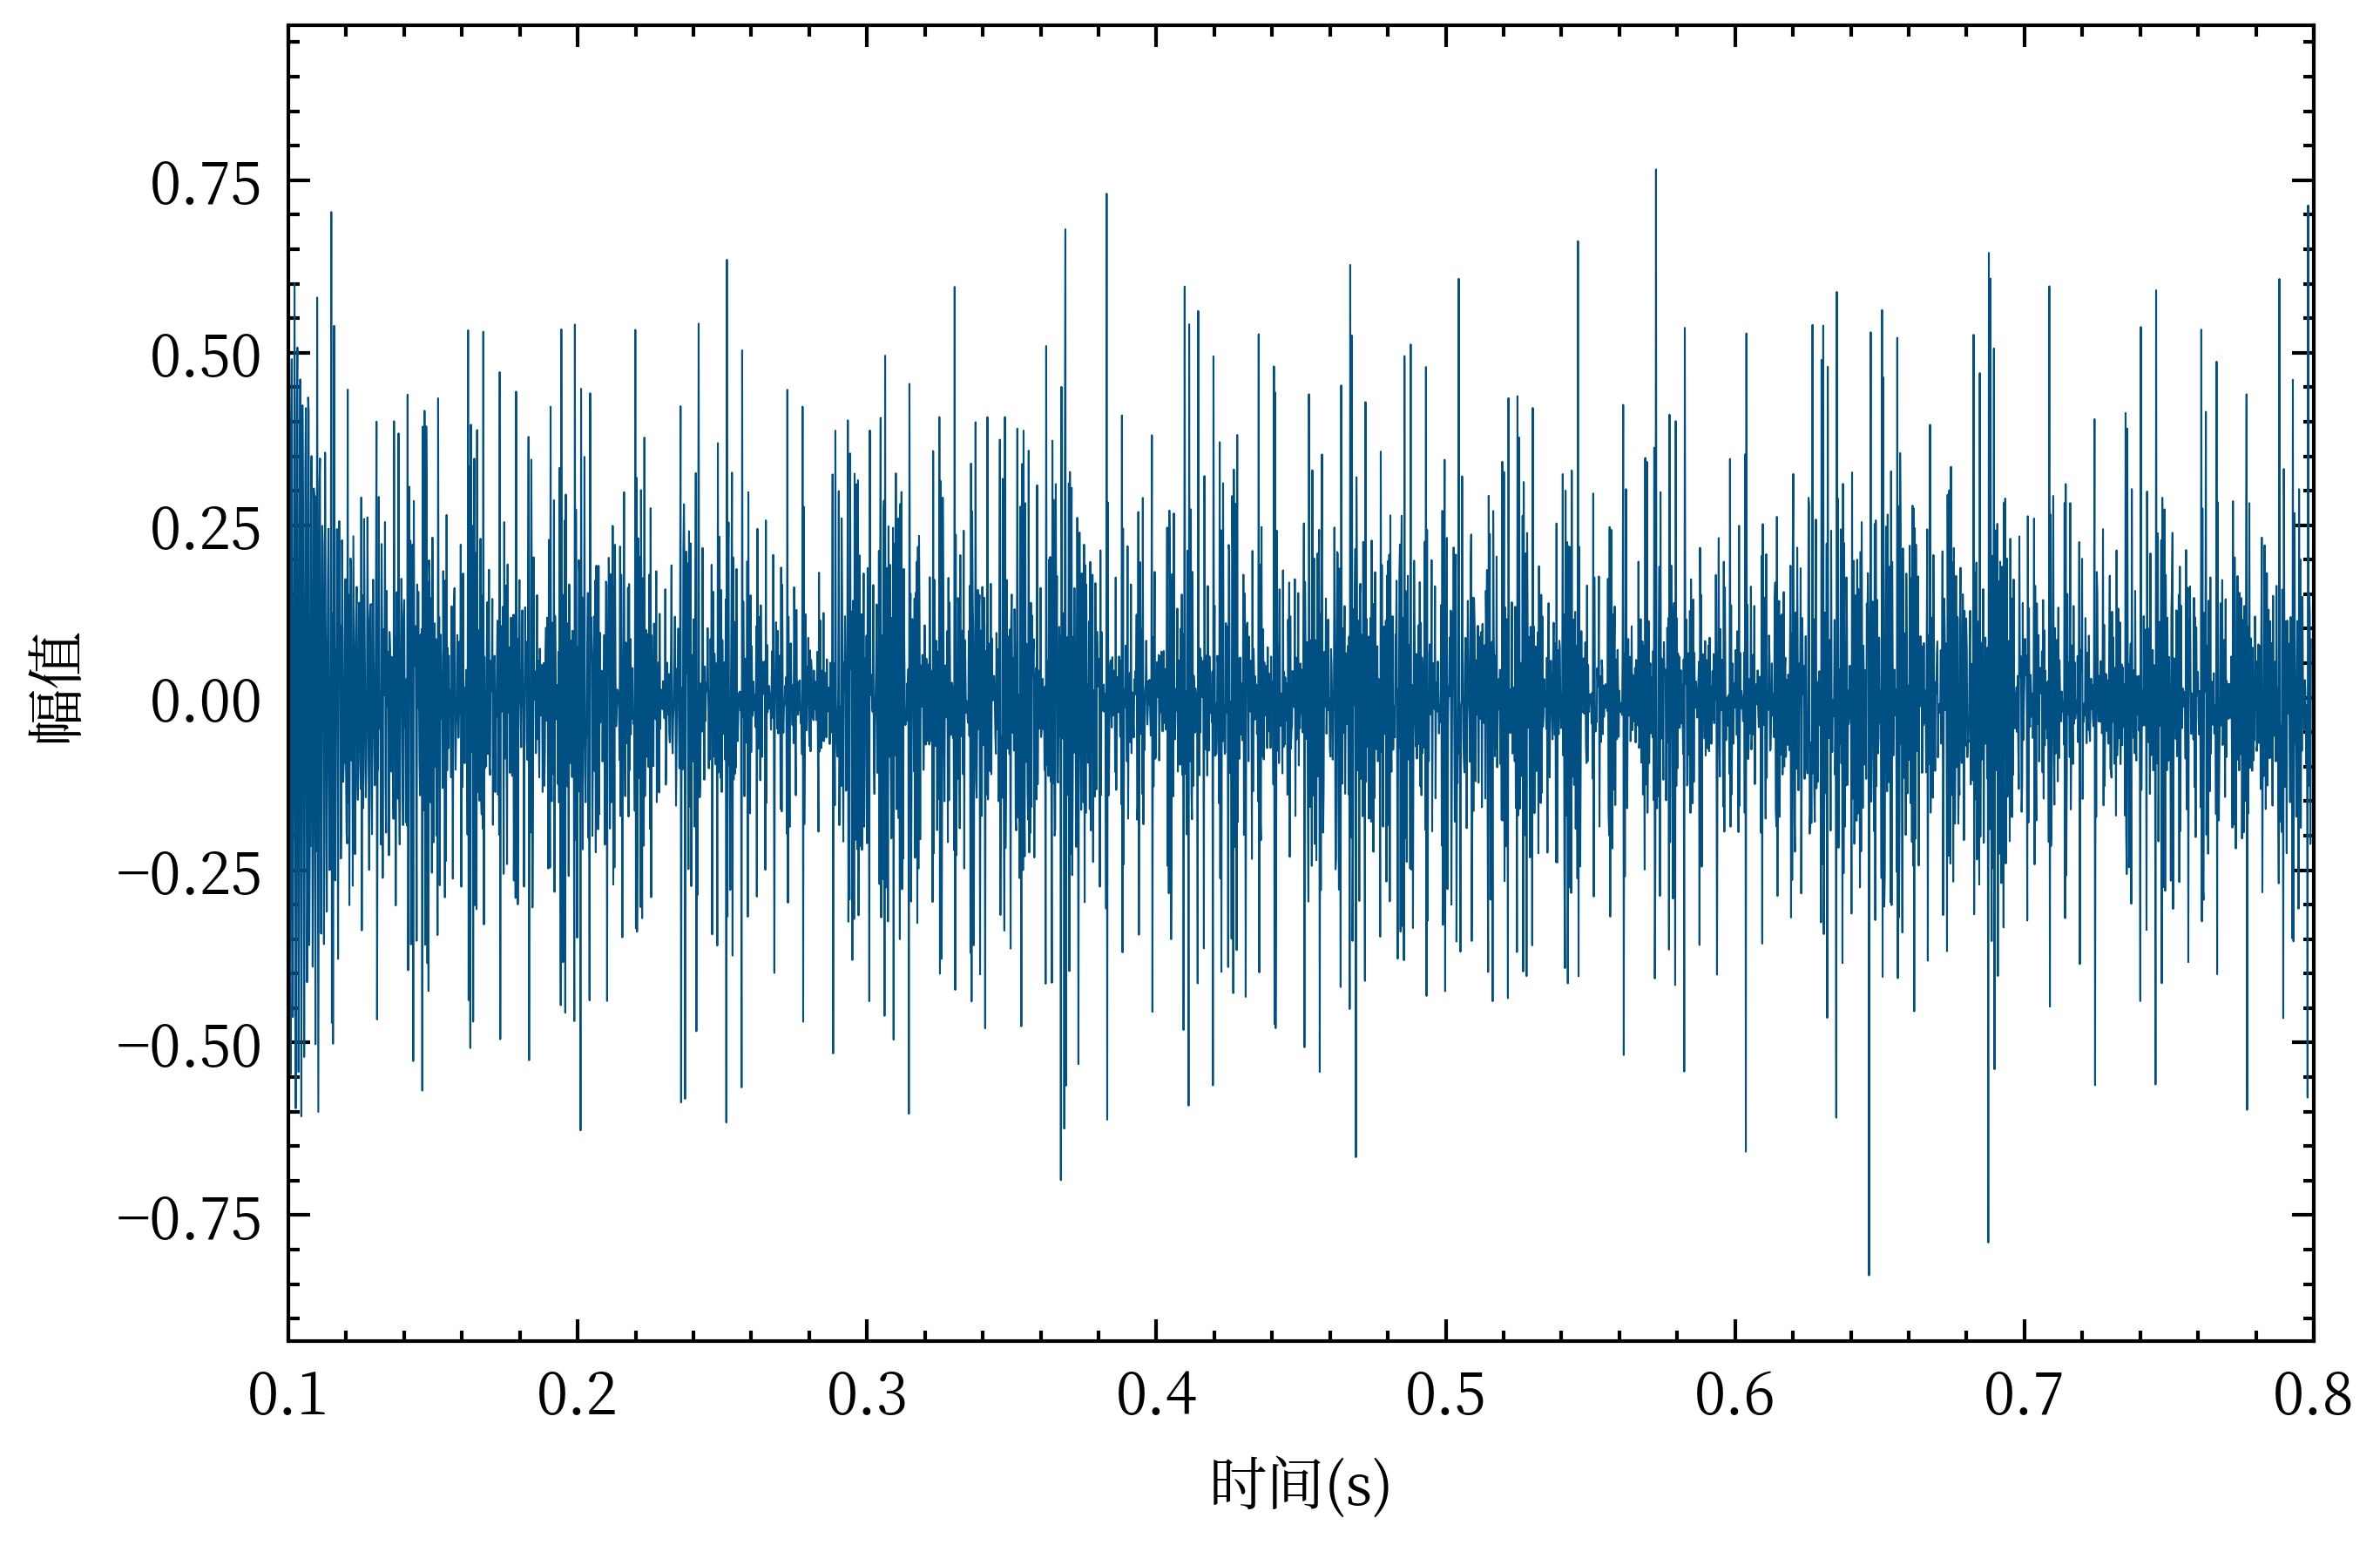

In [54]:
sheetName = 'small_broken_small_crack_vibrat'
sampling_frequency = 5120
signals = data[sheetName]
time = signals['Unnamed: 0'][500:]
sig = signals['x'][500:]

fig, ax = plt.subplots(1, 1, figsize=(6 / 1.2, 4 / 1.2), dpi=600)
ax.plot(time, sig, color=(0, 80 / 255, 131 / 255), linewidth=0.25)
ax.set_xlabel('时间(s)')
ax.set_ylabel('幅值')
ax.set_xlim(0.1, 0.8)
plt.savefig('figs/simulation_time_domain_small_broken_small_crack.png', dpi=300, bbox_inches='tight',
            pad_inches=0, transparent=True)
plt.show()

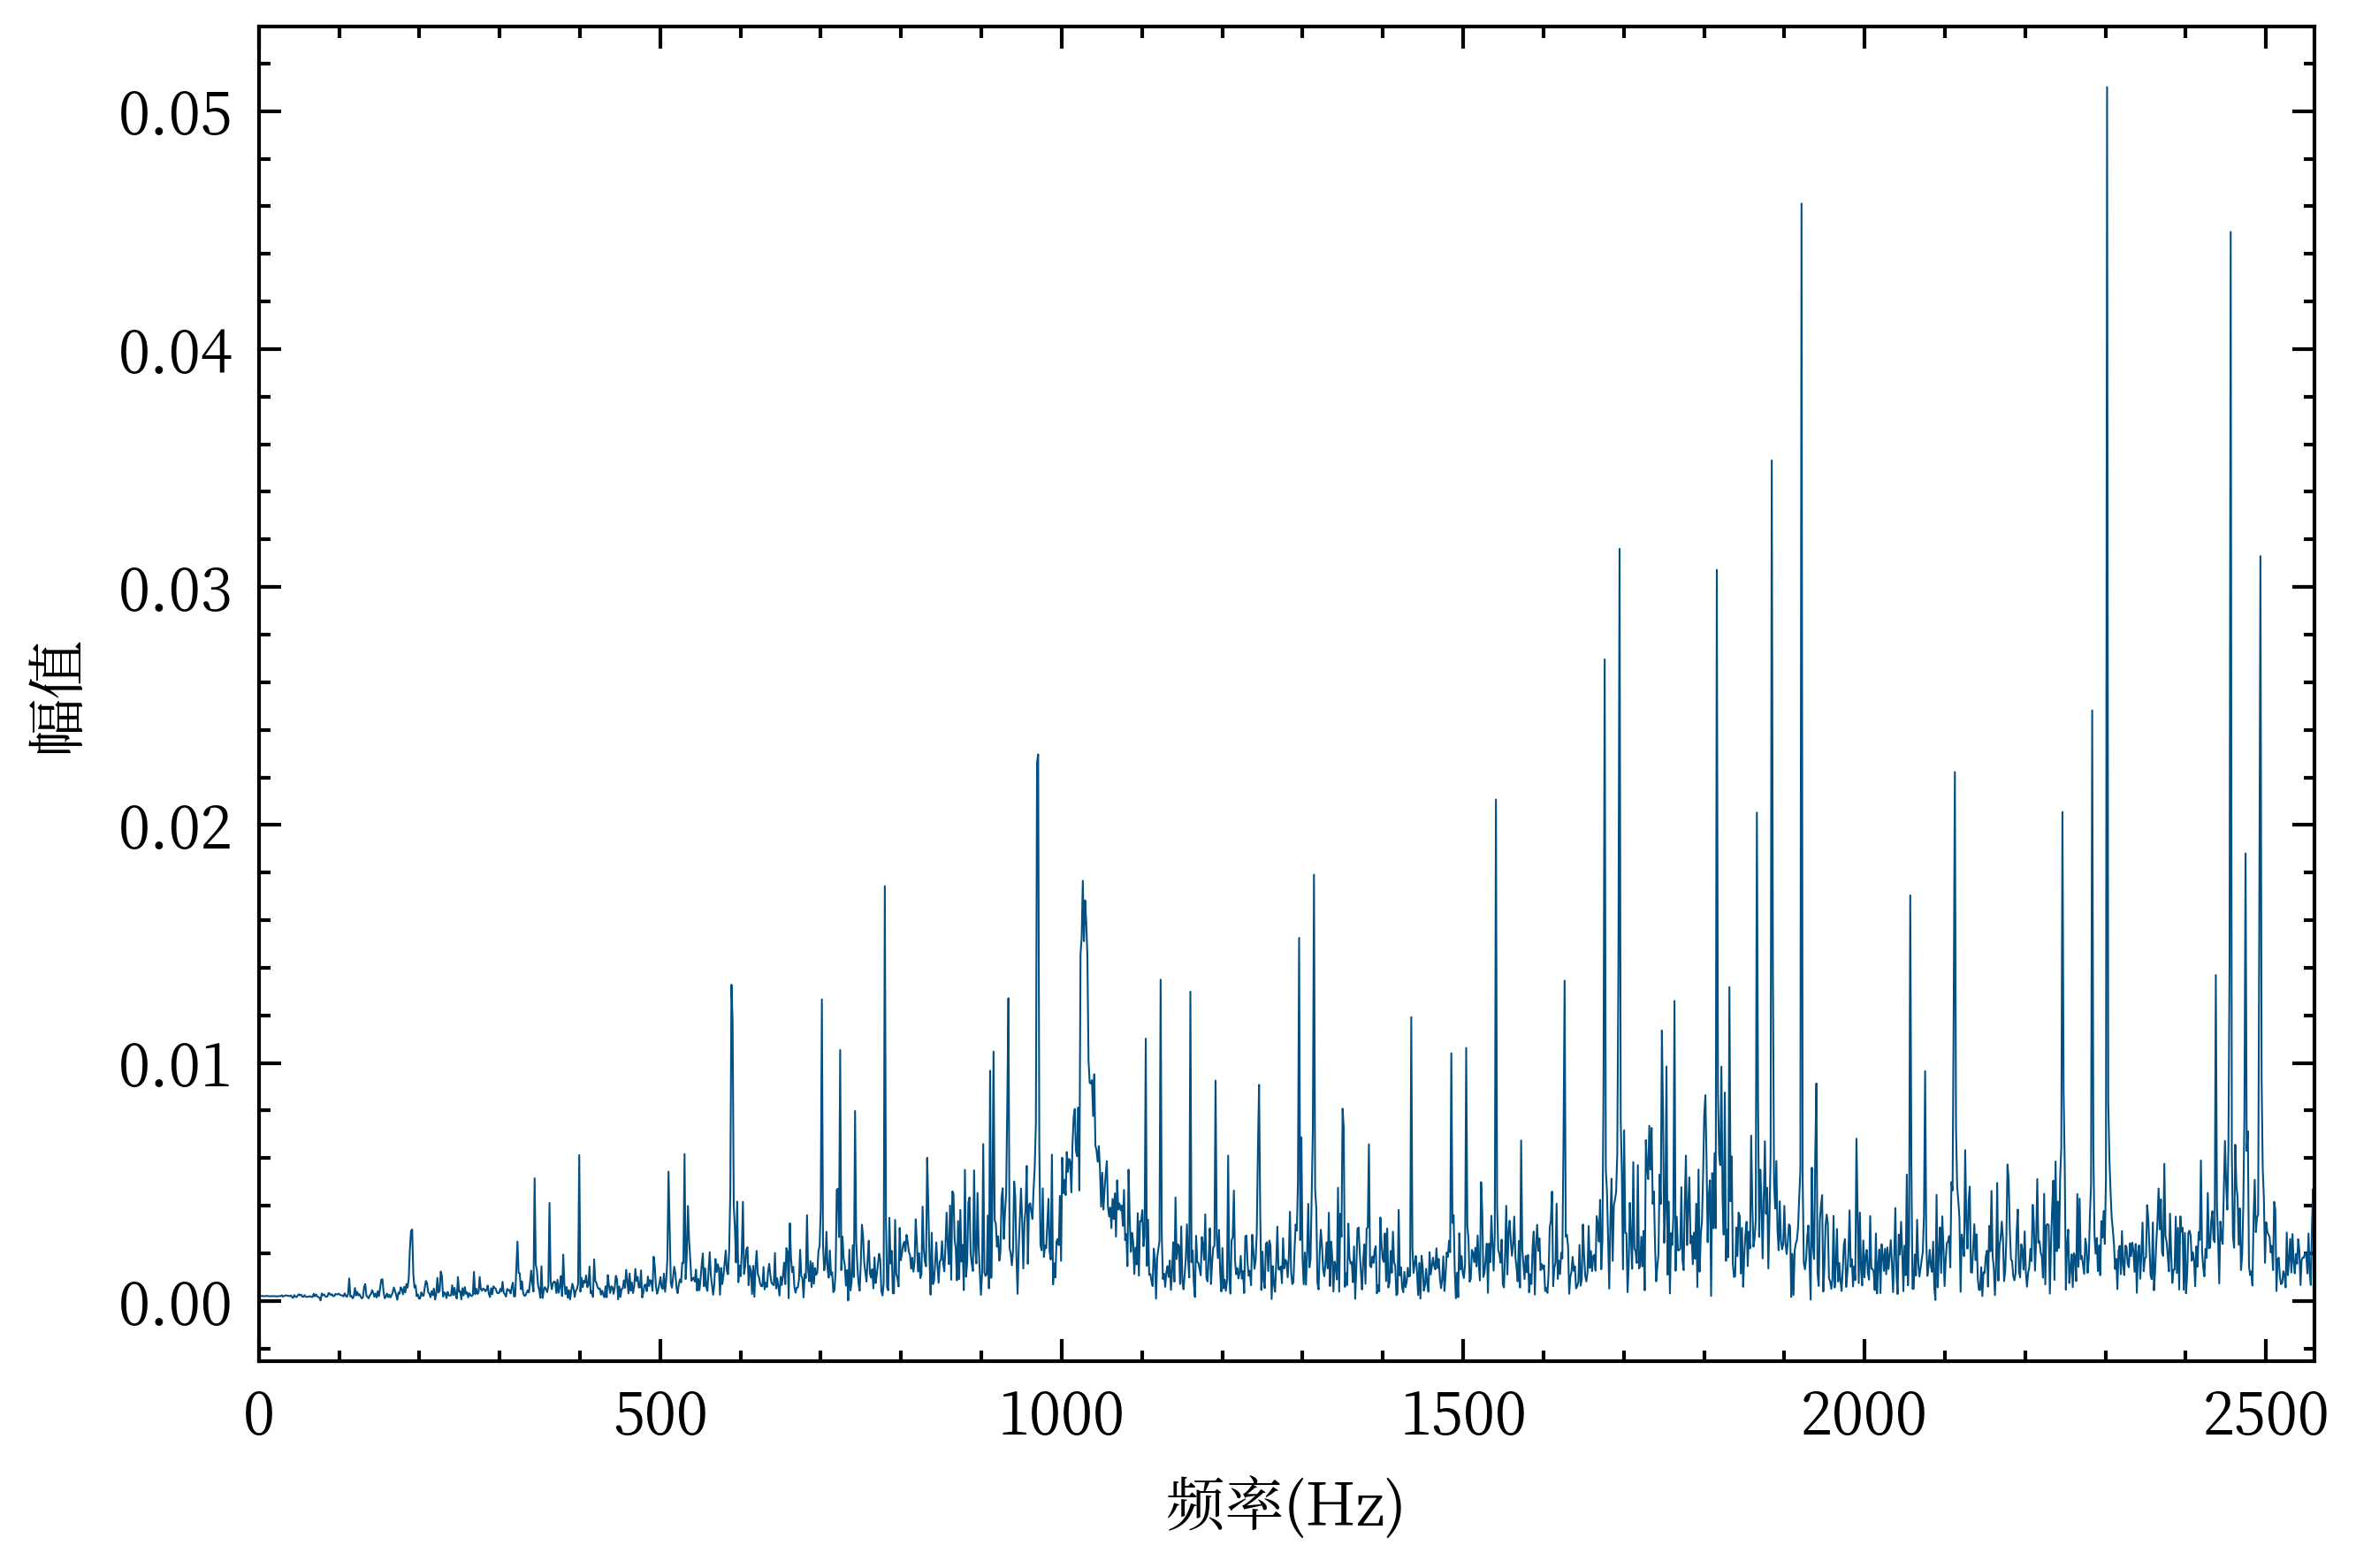

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(6 / 1.2, 4 / 1.2), dpi=600)
fre, amp = FFT.fft(sig, sampling_frequency)
ax.plot(fre, amp, color=(0, 80 / 255, 131 / 255), linewidth=0.25)
ax.set_xlabel('频率(Hz)')
ax.set_ylabel('幅值')
ax.set_xlim(0, 5120/2)
plt.savefig('figs/simulation_frequency_domain_small_broken_small_crack.png', dpi=300, bbox_inches='tight',
            pad_inches=0, transparent=True)

In [9]:
data.keys()

dict_keys(['big_missing_vibration', 'normal_vibration', 'small_broken_small_crack_vibrat', 'small_broken_vibration', 'small_crack_big_missing_vibrati', 'small_crack_vibration'])

In [29]:
signals.plot()

<AxesSubplot:>